In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

##EDA


In [2]:
import kagglehub

path = kagglehub.dataset_download("joniarroba/noshowappointments")

100%|██████████| 2.40M/2.40M [00:00<00:00, 3.98MB/s]

Extracting files...


In [3]:
import os
files = os.listdir(path)
path = path + '/' + files[0]
print(path)

/root/.cache/kagglehub/datasets/joniarroba/noshowappointments/versions/5/KaggleV2-May-2016.csv


In [4]:
data = pd.read_csv(path)

data.shape

(110527, 14)

In [5]:
print(data.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [6]:
from tabulate import tabulate
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
data_p = data.drop(['PatientId', 'AppointmentID'], axis=1)
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [8]:
data_p


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


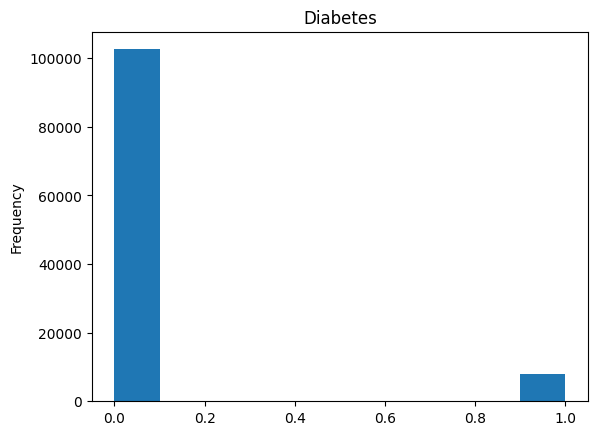

In [9]:
data_p['Diabetes'].plot(kind='hist', title='Diabetes')
plt.show()

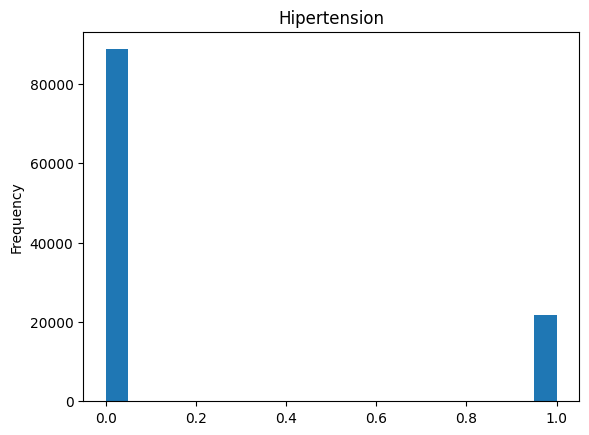

In [10]:
data_p['Hipertension'].plot(kind='hist', bins=20, title='Hipertension')
plt.show()

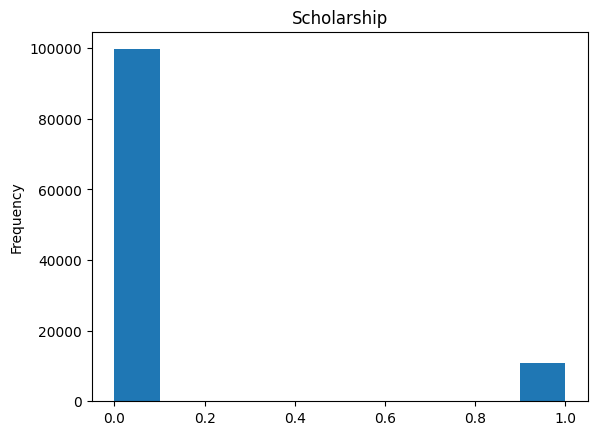

In [11]:
from matplotlib import pyplot as plt
data_p['Scholarship'].plot(kind='hist',  title='Scholarship')
plt.show()

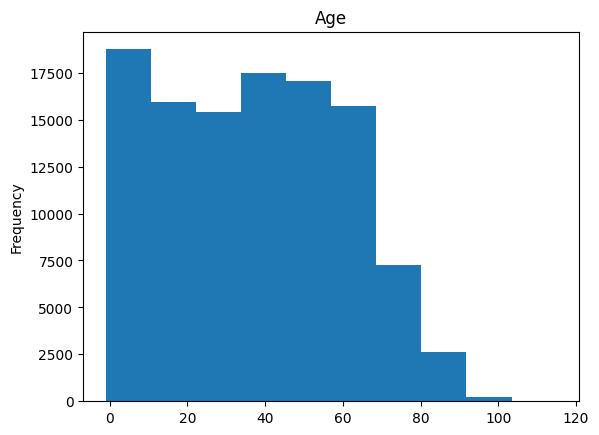

In [12]:
data_p['Age'].plot(kind='hist', title='Age')
plt.show()

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
data_p = data_p[data_p["Age"] >= 0] #Wtf am I doing

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_p['Gender'] = le.fit_transform(data_p['Gender'])
data_p["Neighbourhood"] = le.fit_transform(data_p["Neighbourhood"])
data_p['No-show'] = le.fit_transform(data_p['No-show']) # False -> 0
data_p['AppointmentDay'] = le.fit_transform(data_p['AppointmentDay'])
data_p['ScheduledDay'] = le.fit_transform(data_p['ScheduledDay'])
data_p.head()

<ipython-input-14-67efad29a79e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p['Gender'] = le.fit_transform(data_p['Gender'])
<ipython-input-14-67efad29a79e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p["Neighbourhood"] = le.fit_transform(data_p["Neighbourhood"])
<ipython-input-14-67efad29a79e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,27741,0,62,39,0,1,0,0,0,0,0
1,1,27503,0,56,39,0,0,0,0,0,0,0
2,0,27538,0,62,45,0,0,0,0,0,0,0
3,0,27708,0,8,54,0,0,0,0,0,0,0
4,0,27497,0,56,39,0,1,1,0,0,0,0


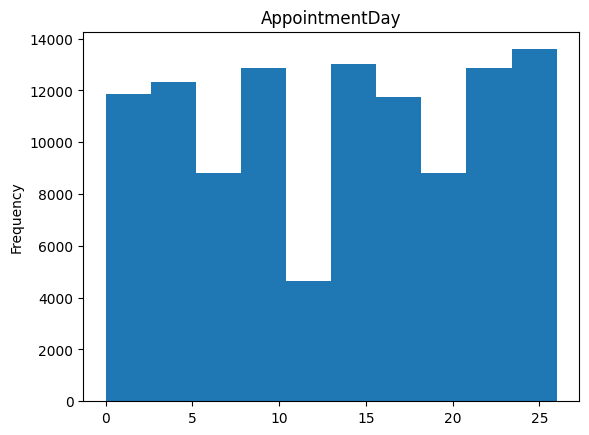

In [15]:
data_p['AppointmentDay'].plot(kind='hist', title='AppointmentDay')
plt.show()

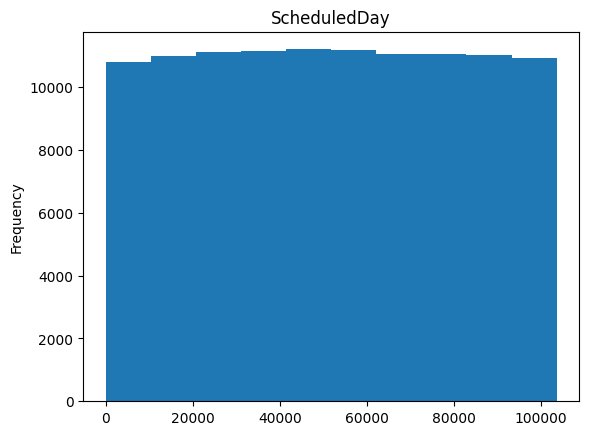

In [16]:
data_p['ScheduledDay'].plot(kind='hist', title='ScheduledDay')
plt.show()

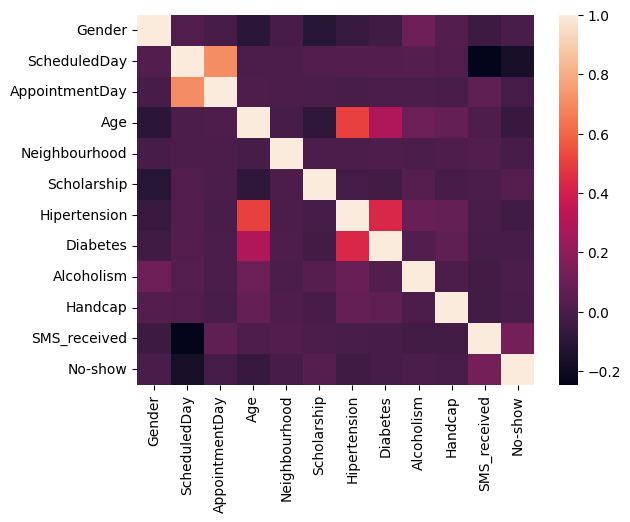

In [17]:
sns.heatmap(data_p.corr(),  annot=False)
plt.show()

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data_p.drop('No-show', axis=1).values
Y = data_p['No-show'].values

X = scaler.fit_transform(X)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

percent_positives = (Y_train.sum().item() / Y_train.numel()) * 100
print(percent_positives)
dataset = TensorDataset(X_train, Y_train)
dataset = DataLoader(dataset, batch_size=32, shuffle=True)


20.27595566613888


##Model 1


In [120]:
class my_ffnn():
  def __init__(self) -> None:
    self.W1 = np.random.randn(2,25)
    self.b1 = np.random.randn(1,25)

##Model 2
Written in pytorch



In [121]:
import torch
import torch.nn as nn

class ffnn(nn.Module):
  def __init__(self):
    super (ffnn, self).__init__()
    self.layer1 = nn.Linear(11, 2)

    self.RELU = nn.ReLU()

  def forward(self, x):
    x = self.layer1(x)
    x = self.RELU(x)

    return x

In [181]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.model_selection import train_test_split
assert torch.cuda.is_available()

device = torch.device("cuda")

model = ffnn()
model = model.to(device)

loss = nn.CrossEntropyLoss()


def train(model, loss_function, x, epochs):
   loss_history = []
   model.train()
   optimizer = optim.Adam(model.parameters(), 1e-12)

   for epoch in range(epochs):
    total_loss = 0
    correct_prediction = 0
    total_prediction = 0
    for x, y in dataset:

      x = x.clone().detach().to(device)
      y = y.clone().detach().to(device)

      logits = model(x)
      loss = loss_function(logits, y)
      total_loss += loss.item()*x.size(0) #frogot to scale'em up

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      y_hat = torch.argmax(logits, dim = 1)
      correct_prediction += (y_hat == y).sum().item()
      total_prediction += y_hat.shape[0]

    epoch_loss = total_loss / total_prediction
    loss_history.append(epoch_loss)
    epoch_acc = correct_prediction / total_prediction
    print(f"Epoch: {epoch+1}, Loss: {epoch_loss}, Accuracy: {epoch_acc}")
   return loss_history


In [ ]:
loss_his = train(model, loss, X, 50)
plt.plot(loss_his, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()
n += 1

Epoch: 1, Loss: 0.731342563594636, Accuracy: 0.6388260574530649
Epoch: 2, Loss: 0.731342563513743, Accuracy: 0.6388260574530649
Epoch: 3, Loss: 0.7313425651450849, Accuracy: 0.6388260574530649
Epoch: 4, Loss: 0.7313425621142945, Accuracy: 0.6388260574530649
Epoch: 5, Loss: 0.7313425641581904, Accuracy: 0.6388260574530649
Epoch: 6, Loss: 0.7313425634652073, Accuracy: 0.6388260574530649
Epoch: 7, Loss: 0.731342564516816, Accuracy: 0.6388260574530649
Epoch: 8, Loss: 0.7313425628072777, Accuracy: 0.6388260574530649
Epoch: 9, Loss: 0.7313425643900837, Accuracy: 0.6388260574530649
Epoch: 10, Loss: 0.7313425626940275, Accuracy: 0.6388260574530649
Epoch: 11, Loss: 0.731342563519136, Accuracy: 0.6388260574530649
Epoch: 12, Loss: 0.7313425641015654, Accuracy: 0.6388260574530649
Epoch: 13, Loss: 0.7313425605368814, Accuracy: 0.6388260574530649
Epoch: 14, Loss: 0.7313425621763124, Accuracy: 0.6388260574530649
Epoch: 15, Loss: 0.7313425621277767, Accuracy: 0.6388260574530649
Epoch: 16, Loss: 0.7313

Accuracy: 0.6449
F1 Score: 0.2358
PR AUC: 0.2104


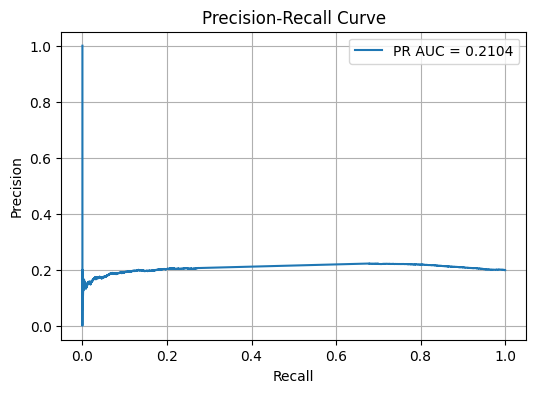

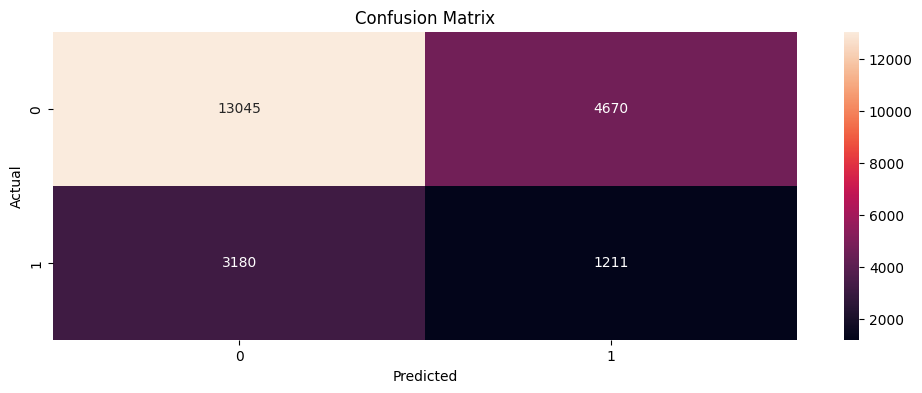

In [178]:
metrices(model, X_test, Y_test) #Looking for f1 in b/w 0.5-0.6 and PR AUC b/w 0.5-0.6


In [180]:
torch.save(model.state_dict(), 'model_weights' + str(n) + '.pth')

In [177]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_recall_curve,
    average_precision_score, confusion_matrix
)
F1_history = []
PR_AUC_history = []
n = 1
def metrices(model, x, y):
  model.eval()
  model = model.to(device)
  x = x.clone().detach().to(device)
  y = y.clone().detach().to(device)
  with torch.no_grad():
    logits = model(x)
    y_hat = torch.argmax(logits, dim=1)
    correct_prediction = (y_hat == y).sum().item()
    total_prediction = y_hat.shape[0]
    y_prob = torch.nn.functional.softmax(logits, dim=1)[:, 1]

    acc = accuracy_score(y.cpu().numpy(), y_hat.cpu().numpy())
    print(f"Accuracy: {acc:.4f}")

    f1 = f1_score(y.cpu(), y_hat.cpu(), average='binary')
    print(f"F1 Score: {f1:.4f}")
    F1_history.append(f1)

    precision, recall, _ = precision_recall_curve(y.cpu(), y_prob.cpu())
    pr_auc = average_precision_score(y.cpu(), y_prob.cpu())
    PR_AUC_history.append(pr_auc)
    print(f"PR AUC: {pr_auc:.4f}")
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

    cm = confusion_matrix(y.cpu(), y_hat.cpu())
    plt.figure(figsize=(12, 4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

2